In [302]:
#importing the Library
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [303]:
#importing the dataset 
df_cf=pd.read_csv("C:/Users/Admin/Documents/Coca_cola_Cashflow_statement.csv")

In [304]:
df_cf.head()

,DT,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
0,31-03-2009,-599,3923.0,-975.0,1295.0
1,30-06-2009,-565,623.0,-297.0,-2344.0
2,30-09-2009,-396,3394.0,-195.0,-1617.0
3,31-12-2009,-2589,3706.0,-1629.0,2113.0
4,31-03-2010,-1368,3889.0,-5326.0,704.0


In [305]:
#checking for null values
df_cf.isnull().sum()

DT                                     0
Cash_Flow_from_Investing_Activities    0
Cash Flow from Operating Activities    0
Cash Flow from Financial Activities    0
Net Cash Flow                          0
dtype: int64

In [306]:
df_cf.tail()

,DT,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
49,30-06-2021,2034,1326.0,-1043.0,-1337.0
50,30-09-2021,166,1916.0,-1409.0,-1825.0
51,31-12-2021,-4684,2608.0,-1026.0,1199.0
52,31-03-2022,146,2789.0,-1675.0,831.0
53,30-06-2022,-1291,873.0,1817.0,2115.0


In [307]:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DT                                   54 non-null     object 
 1   Cash_Flow_from_Investing_Activities  54 non-null     int64  
 2   Cash Flow from Operating Activities  54 non-null     float64
 3   Cash Flow from Financial Activities  54 non-null     float64
 4   Net Cash Flow                        54 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [308]:
# changing dt data type to datetime format
df_cf["DT"]=pd.to_datetime(df_cf["DT"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '31-03-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '30-06-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '30-09-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipyker

In [309]:
#setting dt as the index
df_cf.set_index("DT",inplace=True)

In [310]:
del df_cf["Net Cash Flow"],df_cf["Cash Flow from Operating Activities"],df_cf["Cash Flow from Financial Activities"]

<AxesSubplot:xlabel='DT'>

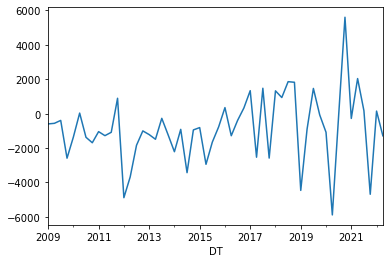

In [311]:
df_cf['Cash_Flow_from_Investing_Activities'].plot()

In [312]:
from statsmodels.tsa.stattools import adfuller

In [313]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [314]:
adf_test(df_cf['Cash_Flow_from_Investing_Activities'])

ADF Statistics: -6.904545004278857
p- value: 1.2570125508017653e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [315]:
df_cf.head()

,Cash_Flow_from_Investing_Activities
DT,
2009-03-31,-599
2009-06-30,-565
2009-09-30,-396
2009-12-31,-2589
2010-03-31,-1368


In [316]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

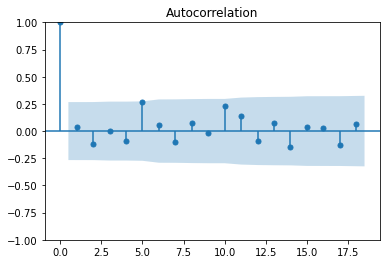

In [317]:
acf = plot_acf(df_cf["Cash_Flow_from_Investing_Activities"].dropna())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


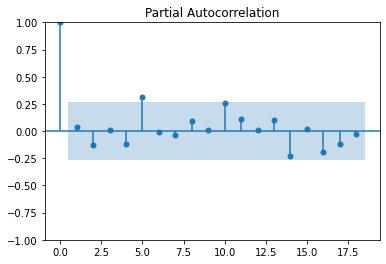

In [318]:
pacf12 = plot_pacf(df_cf["Cash_Flow_from_Investing_Activities"].dropna())

In [319]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,12,31)
test_dataset_end=datetime(2022,6,30)

In [320]:
train_data=df_cf[:train_dataset_end]
test_data=df_cf[train_dataset_end+timedelta(days=1):test_dataset_end]

In [321]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [322]:
test_data

,Cash_Flow_from_Investing_Activities
DT,
2020-03-31,-1084
2020-06-30,-5883
2020-09-30,-105
2020-12-31,5595
2021-03-31,-281
2021-06-30,2034
2021-09-30,166
2021-12-31,-4684
2022-03-31,146


In [323]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [497]:
model_ARIMA=ARIMA(train_data['Cash_Flow_from_Investing_Activities'],order=(0,0,0))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [498]:
model_Arima_fit=model_ARIMA.fit()

In [499]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Cash_Flow_from_Investing_Activities   No. Observations:                   44
Model:                                           ARIMA   Log Likelihood                -386.257
Date:                                 Wed, 28 Sep 2022   AIC                            776.514
Time:                                         14:00:07   BIC                            780.082
Sample:                                     03-31-2009   HQIC                           777.837
                                          - 12-31-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -948.9274    241.883     -3.923      0.000   -1423.009    -474.846
sigma2      2.466e+06    5.4e+05      4.567      0.000    1.41e+06    3.52e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.80   Prob(JB):                         0.73
Heteroskedasticity (H):               1.90   Skew:                            -0.29
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [500]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2020-03-31 00:00:00
2022-06-30 00:00:00


In [501]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Cash_Flow_from_Investing_Activities']-pred

In [502]:
pred

2020-03-31   -948.927419
2020-06-30   -948.927419
2020-09-30   -948.927419
2020-12-31   -948.927419
2021-03-31   -948.927419
2021-06-30   -948.927419
2021-09-30   -948.927419
2021-12-31   -948.927419
2022-03-31   -948.927419
2022-06-30   -948.927419
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [503]:
residuals

DT
2020-03-31    -135.072581
2020-06-30   -4934.072581
2020-09-30     843.927419
2020-12-31    6543.927419
2021-03-31     667.927419
2021-06-30    2982.927419
2021-09-30    1114.927419
2021-12-31   -3735.072581
2022-03-31    1094.927419
2022-06-30    -342.072581
dtype: float64

<AxesSubplot:ylabel='Density'>

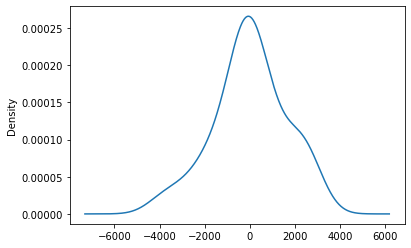

In [504]:
model_Arima_fit.resid.plot(kind='kde')

In [505]:
test_data['Predicted_ARIMA']=pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='DT'>

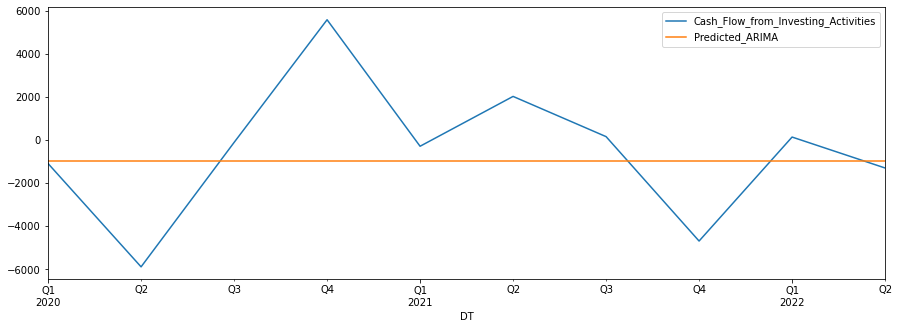

In [506]:
test_data[['Cash_Flow_from_Investing_Activities','Predicted_ARIMA']].plot(figsize=(15,5))

In [507]:
test_data

,Cash_Flow_from_Investing_Activities,Predicted_ARIMA
DT,,
2020-03-31,-1084,-948.927419
2020-06-30,-5883,-948.927419
2020-09-30,-105,-948.927419
2020-12-31,5595,-948.927419
2021-03-31,-281,-948.927419
2021-06-30,2034,-948.927419
2021-09-30,166,-948.927419
2021-12-31,-4684,-948.927419
2022-03-31,146,-948.927419


<AxesSubplot:xlabel='DT'>

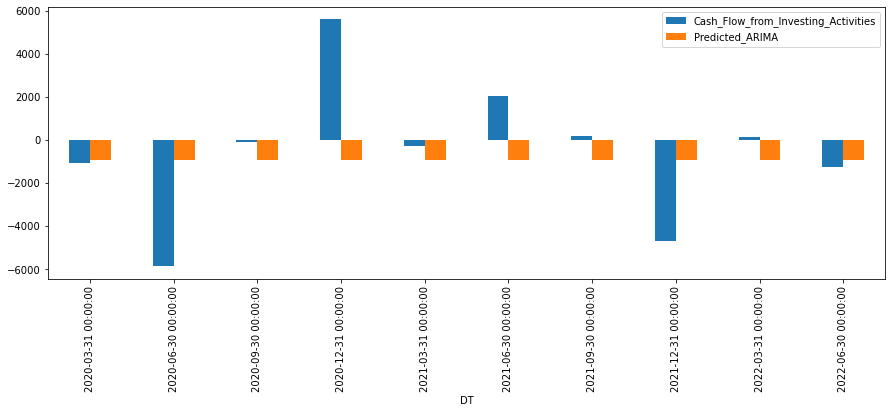

In [508]:
test_data[['Cash_Flow_from_Investing_Activities','Predicted_ARIMA']].plot.bar(figsize=(15,5))

In [509]:
from pandas.tseries.offsets import DateOffset
future_dates=[test_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [510]:
future_dates

[Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-30 00:00:00'),
 Timestamp('2022-08-30 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-10-30 00:00:00'),
 Timestamp('2022-11-30 00:00:00'),
 Timestamp('2022-12-30 00:00:00'),
 Timestamp('2023-01-30 00:00:00'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-03-30 00:00:00'),
 Timestamp('2023-04-30 00:00:00'),
 Timestamp('2023-05-30 00:00:00'),
 Timestamp('2023-06-30 00:00:00'),
 Timestamp('2023-07-30 00:00:00'),
 Timestamp('2023-08-30 00:00:00'),
 Timestamp('2023-09-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-11-30 00:00:00'),
 Timestamp('2023-12-30 00:00:00'),
 Timestamp('2024-01-30 00:00:00'),
 Timestamp('2024-02-29 00:00:00'),
 Timestamp('2024-03-30 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-30 00:00:00')]

In [511]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=test_data.columns)

In [512]:
future_datest_df

,Cash_Flow_from_Investing_Activities,Predicted_ARIMA
2022-07-30,NaN,NaN
2022-08-30,NaN,NaN
2022-09-30,NaN,NaN
2022-10-30,NaN,NaN
2022-11-30,NaN,NaN
2022-12-30,NaN,NaN
2023-01-30,NaN,NaN
2023-02-28,NaN,NaN
2023-03-30,NaN,NaN
2023-04-30,NaN,NaN


In [513]:
future_df=pd.concat([test_data,future_datest_df])

In [514]:
future_df

,Cash_Flow_from_Investing_Activities,Predicted_ARIMA
2020-03-31,-1084,-948.927419
2020-06-30,-5883,-948.927419
2020-09-30,-105,-948.927419
2020-12-31,5595,-948.927419
2021-03-31,-281,-948.927419
2021-06-30,2034,-948.927419
2021-09-30,166,-948.927419
2021-12-31,-4684,-948.927419
2022-03-31,146,-948.927419
2022-06-30,-1291,-948.927419


In [515]:
##prediction
pred_start_date=future_datest_df.index[0]
pred_end_date=future_datest_df.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-07-30 00:00:00
2024-05-30 00:00:00


In [516]:
pred_future=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Cash_Flow_from_Investing_Activities']-pred

In [517]:
pred_future

2022-09-30   -948.927419
2022-12-31   -948.927419
2023-03-31   -948.927419
2023-06-30   -948.927419
2023-09-30   -948.927419
2023-12-31   -948.927419
2024-03-31   -948.927419
2024-06-30   -948.927419
Freq: Q-DEC, Name: predicted_mean, dtype: float64

<AxesSubplot:>

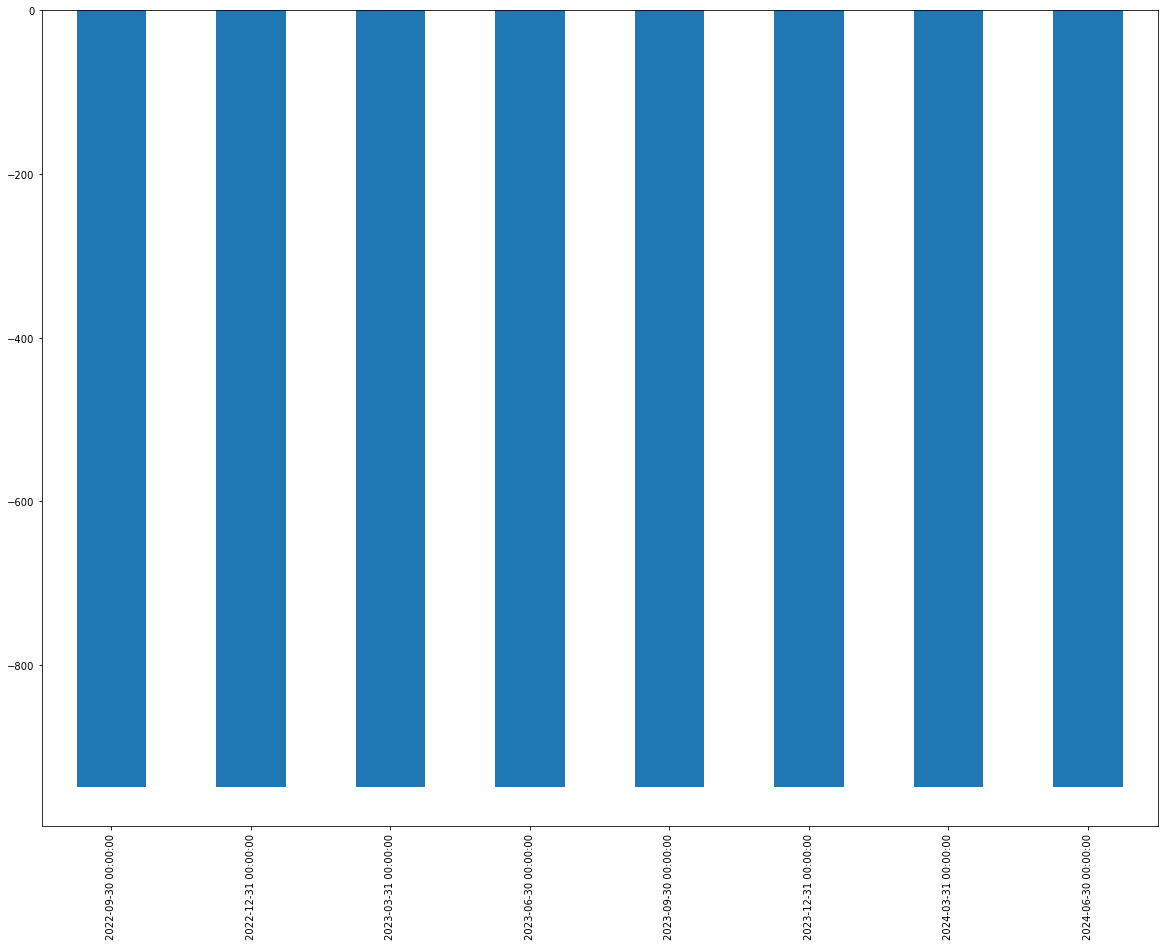

In [518]:
pred_future.plot.bar(figsize=(20,15))